In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight') # pick your style
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [80]:
# load file, check column names
df = pd.read_csv('data.csv')
list(df)

['Timestamp',
 'I am a:',
 'I am from ______ department',
 'Full Name',
 'Email',
 'Phone #',
 'I am printing this for:',
 'What is it?',
 'What is it for?',
 'Please upload the STL file of the part you are printing',
 'Material Type 1',
 'Material Type 2',
 'Amount of Filament/Resin Used (Material 1)',
 'Amount of Filament/Resin Used (Material 2)',
 'Estimated Print Time (hh:mm)',
 'Cost',
 'Printer Used',
 'Sliced by',
 'Loaded by:',
 'Unnamed: 19',
 'Slice the file using the appropriate software and click the appropriate checkbox when finished.',
 'Unnamed: 21',
 'Start the print and ',
 'File Name:',
 'Unnamed: 24']

In [81]:
# drop useless columns
df = df.drop(0)
df = df.drop(axis=1, labels=['Full Name', 'Phone #', 'Email'])
df = df.drop(axis=1, labels=['Unnamed: 21','Unnamed: 19','Unnamed: 24','File Name:','Start the print and '])

In [82]:
# rename columns
df = df.rename(index=str, columns={'Material Type 1': 'MaterialOne', 'Material Type 2':'MaterialTwo',
                                  'Amount of Filament/Resin Used (Material 1)':'AmountOne',
                                  'Amount of Filament/Resin Used (Material 2)':'AmountTwo',
                                  'Slice the file using the appropriate software and click the appropriate checkbox when finished.':'machine',
                                  'What is it?':'part',
                                  'What is it for?':'purpose',
                                  'Printer Used':'printer',
                                  'I am a:':'person',
                                  'I am from ______ department':'department',
                                  'Estimated Print Time (hh:mm)':'time',
                                  'I am printing this for:':'role'})
df

,Timestamp,person,department,role,part,purpose,Please upload the STL file of the part you are printing,MaterialOne,MaterialTwo,AmountOne,AmountTwo,time,Cost,printer,Sliced by,Loaded by:,machine
1,11,Student,Mechanical,Student Org.,Wind Turbine Blade,WiscWind - Wind Turbine Competition Research,https://drive.google.com/open?id=1YOU968q45hsf...,PLA,None,20.00,0.0,5:47:00,1.32,Dodo,Alexander,Vladimir Bouriakov,Ultimaker - Cura
2,14,Student,Mechanical,Research,Aneurysm model,Research project for graduate student,https://drive.google.com/open?id=1AQmFRaGLq_Ar...,PVA,None,45.00,0.0,12:19:00,5.85,Kiwi,Tessa Anderson,Nathaniel Krakauer,Ultimaker - Cura
3,17,Student,Mechanical,Student Org.,ASME Design Team,Design Team,https://drive.google.com/open?id=1Z7hWNZatw00U...,PLA,None,7.00,0.0,12:36:00,0.46,Dodo,Mary Claire,Mary Claire,Ultimaker - Cura
4,21,Student,Biomedical,Class Project,cell holder,bme design\n,https://drive.google.com/open?id=19DFerRu38wld...,PLA,None,48.00,0.0,9:43:00,3.17,Great Auk,Brenna,Brenna Osiecki,Ultimaker - Cura
5,10,Student,Mechanical,Student Org.,A mold piece for a wheel,A mars rover,https://drive.google.com/open?id=1yRZAiQruZBkW...,PLA,None,127.00,0.0,20:00:00,8.38,Weka,NK,Nathaniel Krakauer,Ultimaker - Cura
6,10,Student,Biomedical,Personal,A form for a vacuum mold,Halloween Costume,https://drive.google.com/open?id=13Z-FHAizqBl_...,PLA,None,59.00,0.0,5:04:00,3.89,Rockhopper,NK,Nathaniel Krakauer,Ultimaker - Cura
7,10,Student,Biomedical,Personal,Vacuum Mold Form,Halloween,https://drive.google.com/open?id=1BAcejtjqjxTo...,PLA,None,59.00,0.0,5:04:00,3.89,Yellow-Bellied-Sapsucker,NK,Nathaniel Krakauer,Ultimaker - Cura
8,13,Student,Biomedical,Class Project,Knee Hinge prototype,BME 301,https://drive.google.com/open?id=1N9kQT6lwaWPR...,PLA,None,12.00,0.0,2:55:00,0.79,Kakapo,Evan Bernhagen,Evan Bernhagen,Ultimaker - Cura
9,13,Student,Biomedical,Class Project,OA Knee Brace,BME Design Project,https://drive.google.com/open?id=1Vn3jCvklYFMW...,PLA,None,19.00,0.0,3:49:00,1.25,Great Auk,Student,Denzel Bibbs,Ultimaker - Cura
10,16,Student,Other - College of Engineering,Class Project,ME351 project,heat sink air flow,https://drive.google.com/open?id=1ipuBjLhGY65d...,PLA,None,186.00,0.0,3:41:00,12.4,Yellow-Bellied-Sapsucker,Evan Bernhagen,Evan Bernhagen,Ultimaker - Cura


Text(0.5,1,'Prints per Department')

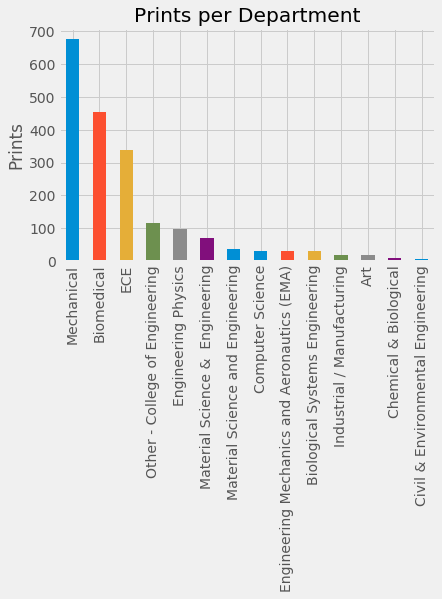

In [83]:
mech = df[df['department'] == 'Mechanical']
bme = df[df['department'] == 'Biomedical']
other = df[df['department'] == 'Other - College of Engineering']
ece = df[df['department'] == 'ECE']
ece = df[df['department'] == 'ECE']
df.department.unique()

df['department'].value_counts()
majorDept = df.groupby('department').filter(lambda x : len(x) > 5)
ax = pd.value_counts(mod['department']).plot.bar()
ax.set_ylabel('Prints')
ax.set_title('Prints per Department')
#ax.set_xticklabels(df.department, rotation=90)

Text(0.5,1,"Spending by Student's Department")

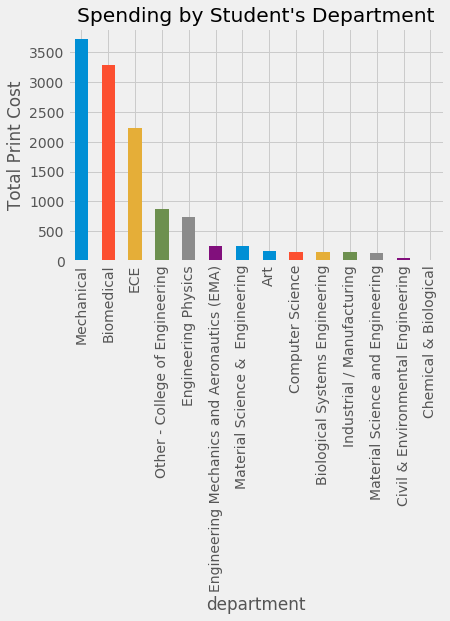

In [84]:
majorDept.Cost = pd.to_numeric(majorDept.Cost)
ls = majorDept.groupby('department')['Cost'].sum()
ls = ls.sort_values(ascending=False)
ax = ls.plot.bar()
ax.set_ylabel('Total Print Cost')
ax.set_title('Spending by Student\'s Department')
#ax.set_xticklabels(majorDept.department.unique(), rotation=40)

Text(0.5,1,'Whose printing?')

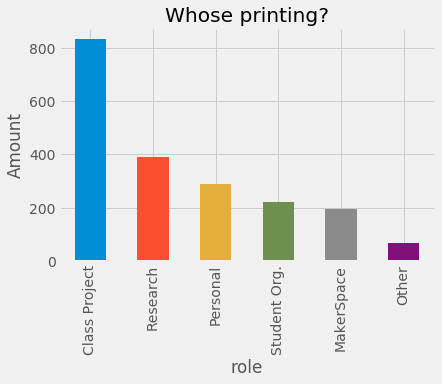

In [90]:
roles = df['role'].value_counts()
ax = roles.plot.bar()
ax.set_ylabel('Amount')
ax.set_xlabel('role')
ax.set_title('Whose printing?')
#majorDept = df.groupby('department').filter(lambda x : len(x) > 5)
#ax = pd.value_counts(mod['role']).plot.bar()